In [1]:
#import packages we need 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.dates as mdate

import warnings
warnings.filterwarnings('ignore')

# Data: Hungary Chicken Pox Cases from 2005 to 2015

In [2]:
#download and save the data 
import requests
import pandas as pd
data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/hungary_chickenpox.csv'
r = requests.get(data_url)
open('hungary_chickenpox.csv', 'wb').write(r.content)
h_cp_ts= pd.read_csv('hungary_chickenpox.csv')

In [3]:
from pandas_profiling import ProfileReport

profile = ProfileReport(h_cp_ts)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
h_cp_ts.head()

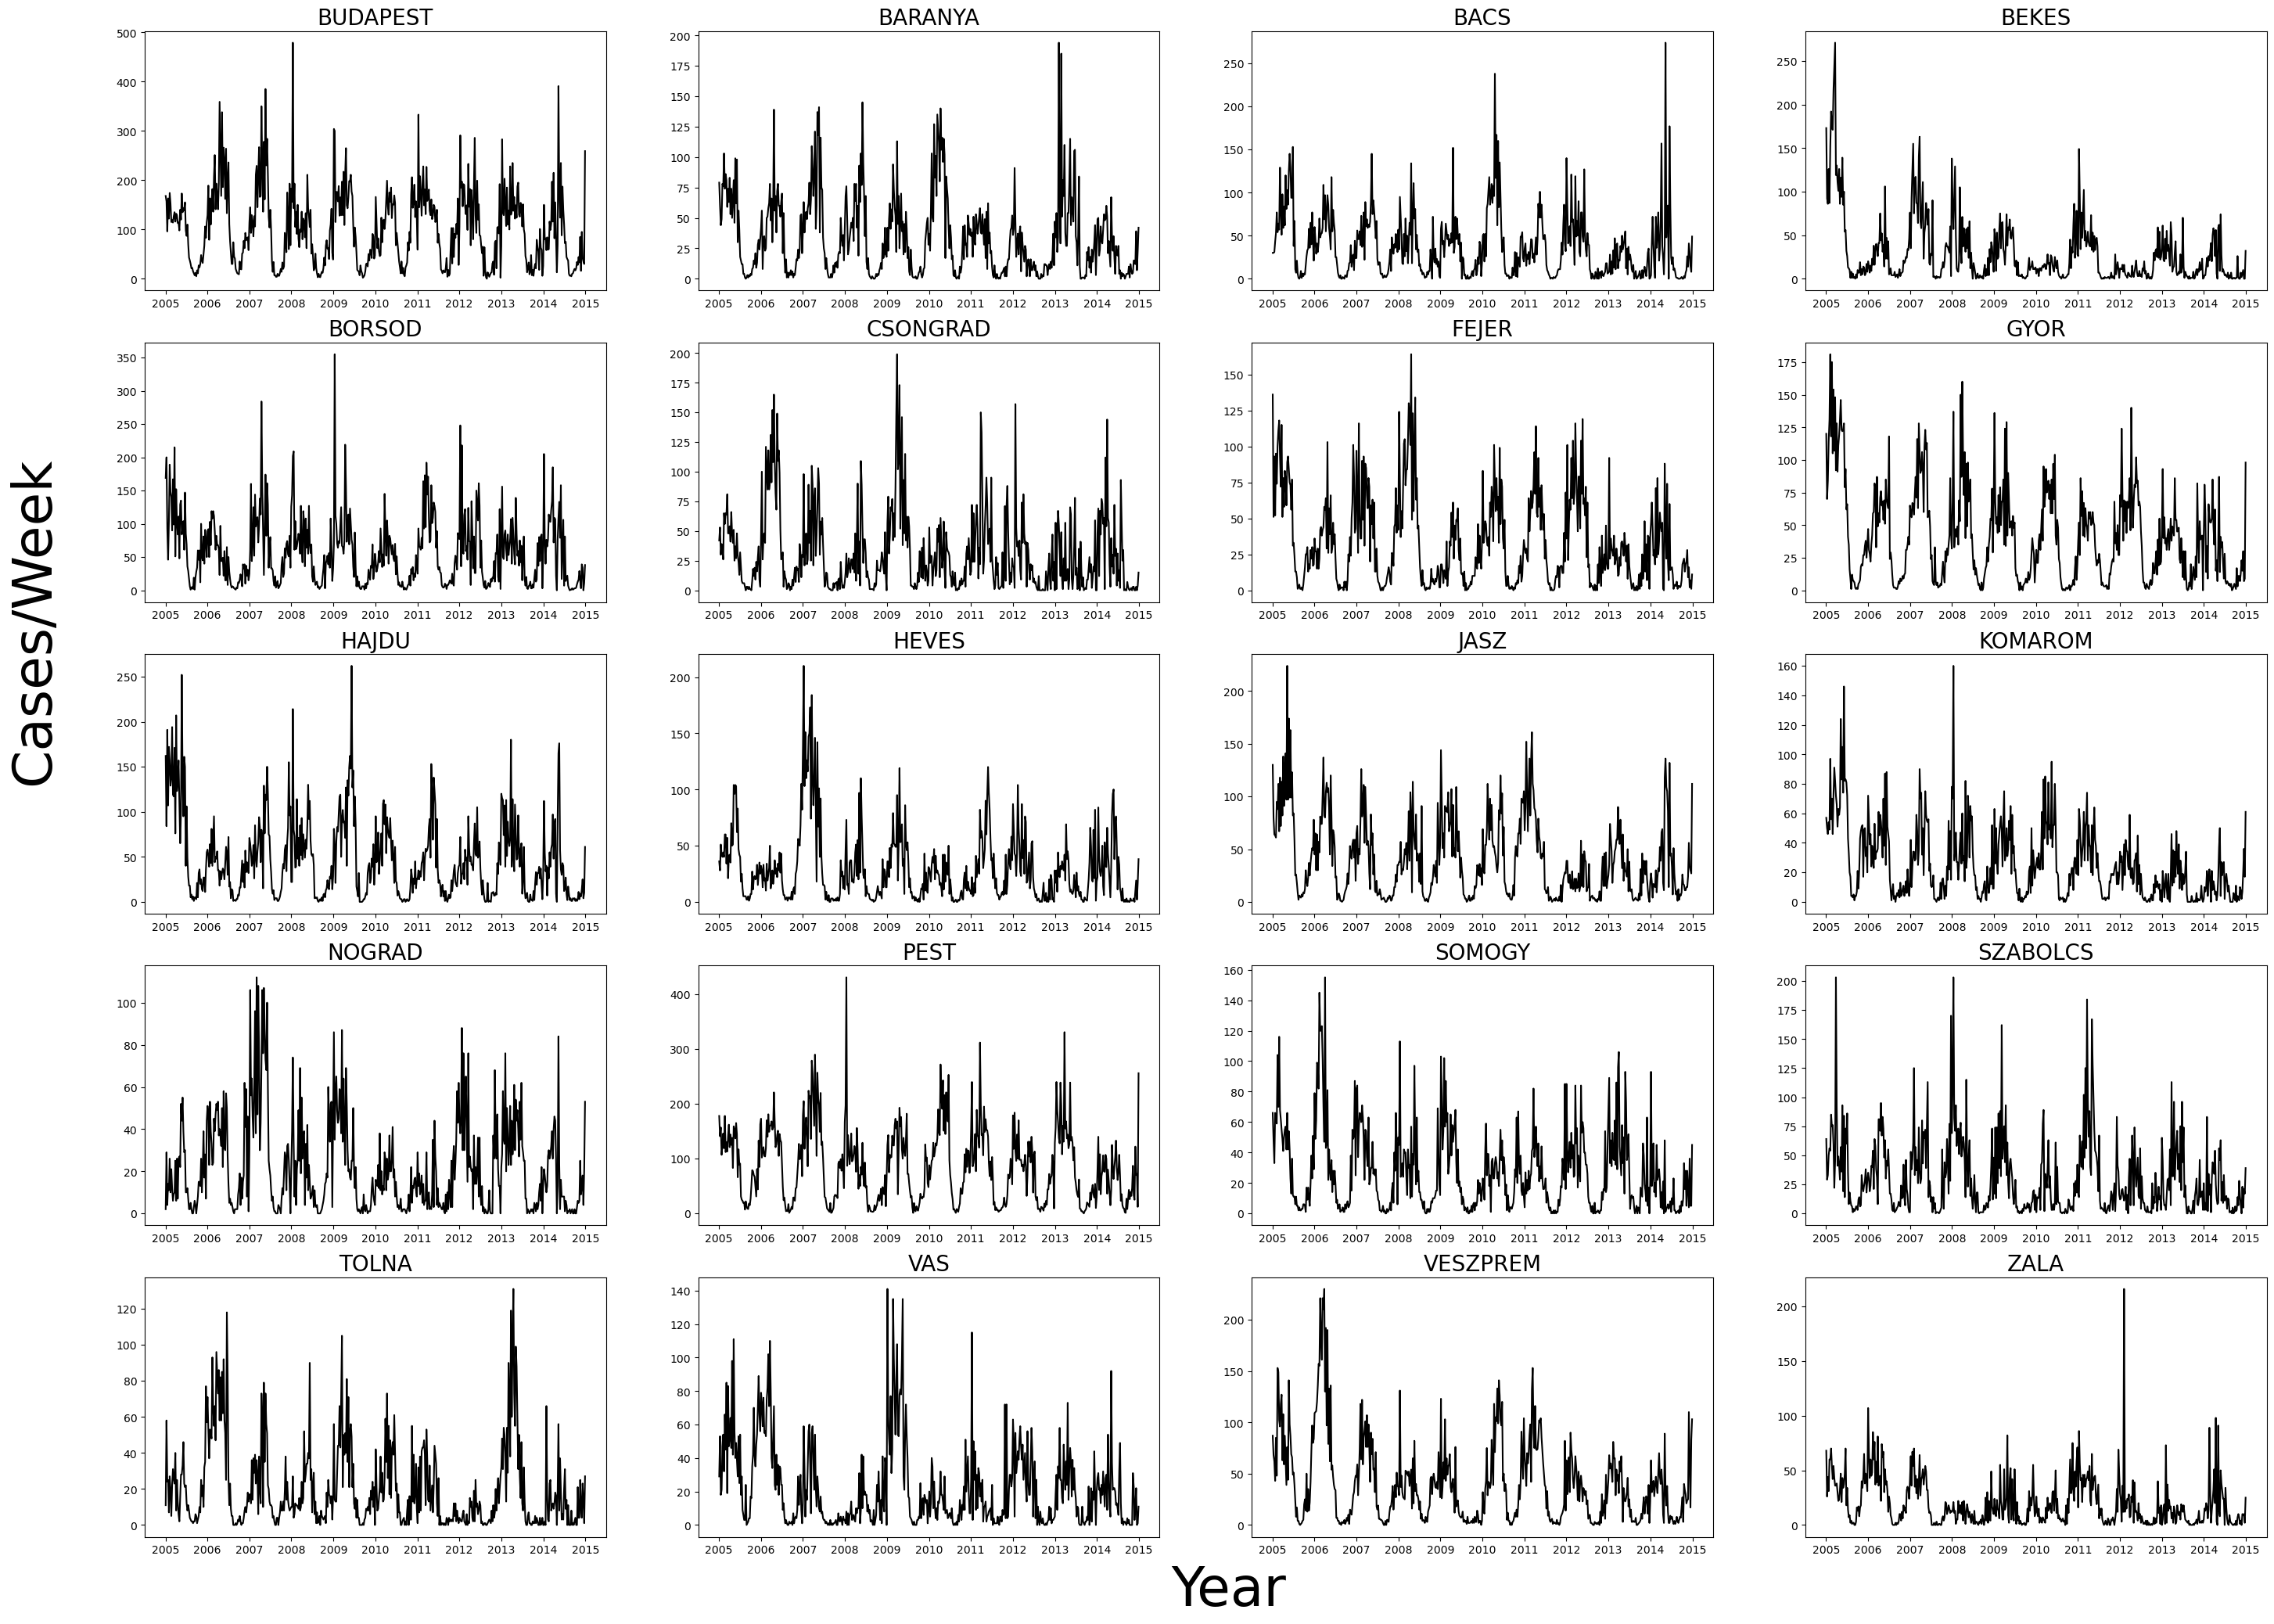

In [ ]:
fig=plt.figure(figsize=(35,25))

pdates=pd.to_datetime(h_cp_ts['Date'],format='%d/%m/%Y')

for i in range(1,21):
    d_ts=h_cp_ts.values[:,i]
    k_ts=h_cp_ts.keys()[i]
    ax=plt.subplot(5,4,i)
    ax.plot(pdates,d_ts,color='k')
    ax.set_title('%s' %k_ts,fontsize=20)
    ax.xaxis.set_major_formatter(mdate.ConciseDateFormatter(ax.xaxis.get_major_locator()))

fig.text(0.075,0.5, 'Cases/Week', fontsize=50,rotation=90);
fig.text(0.5,0.075, 'Year', fontsize=50);

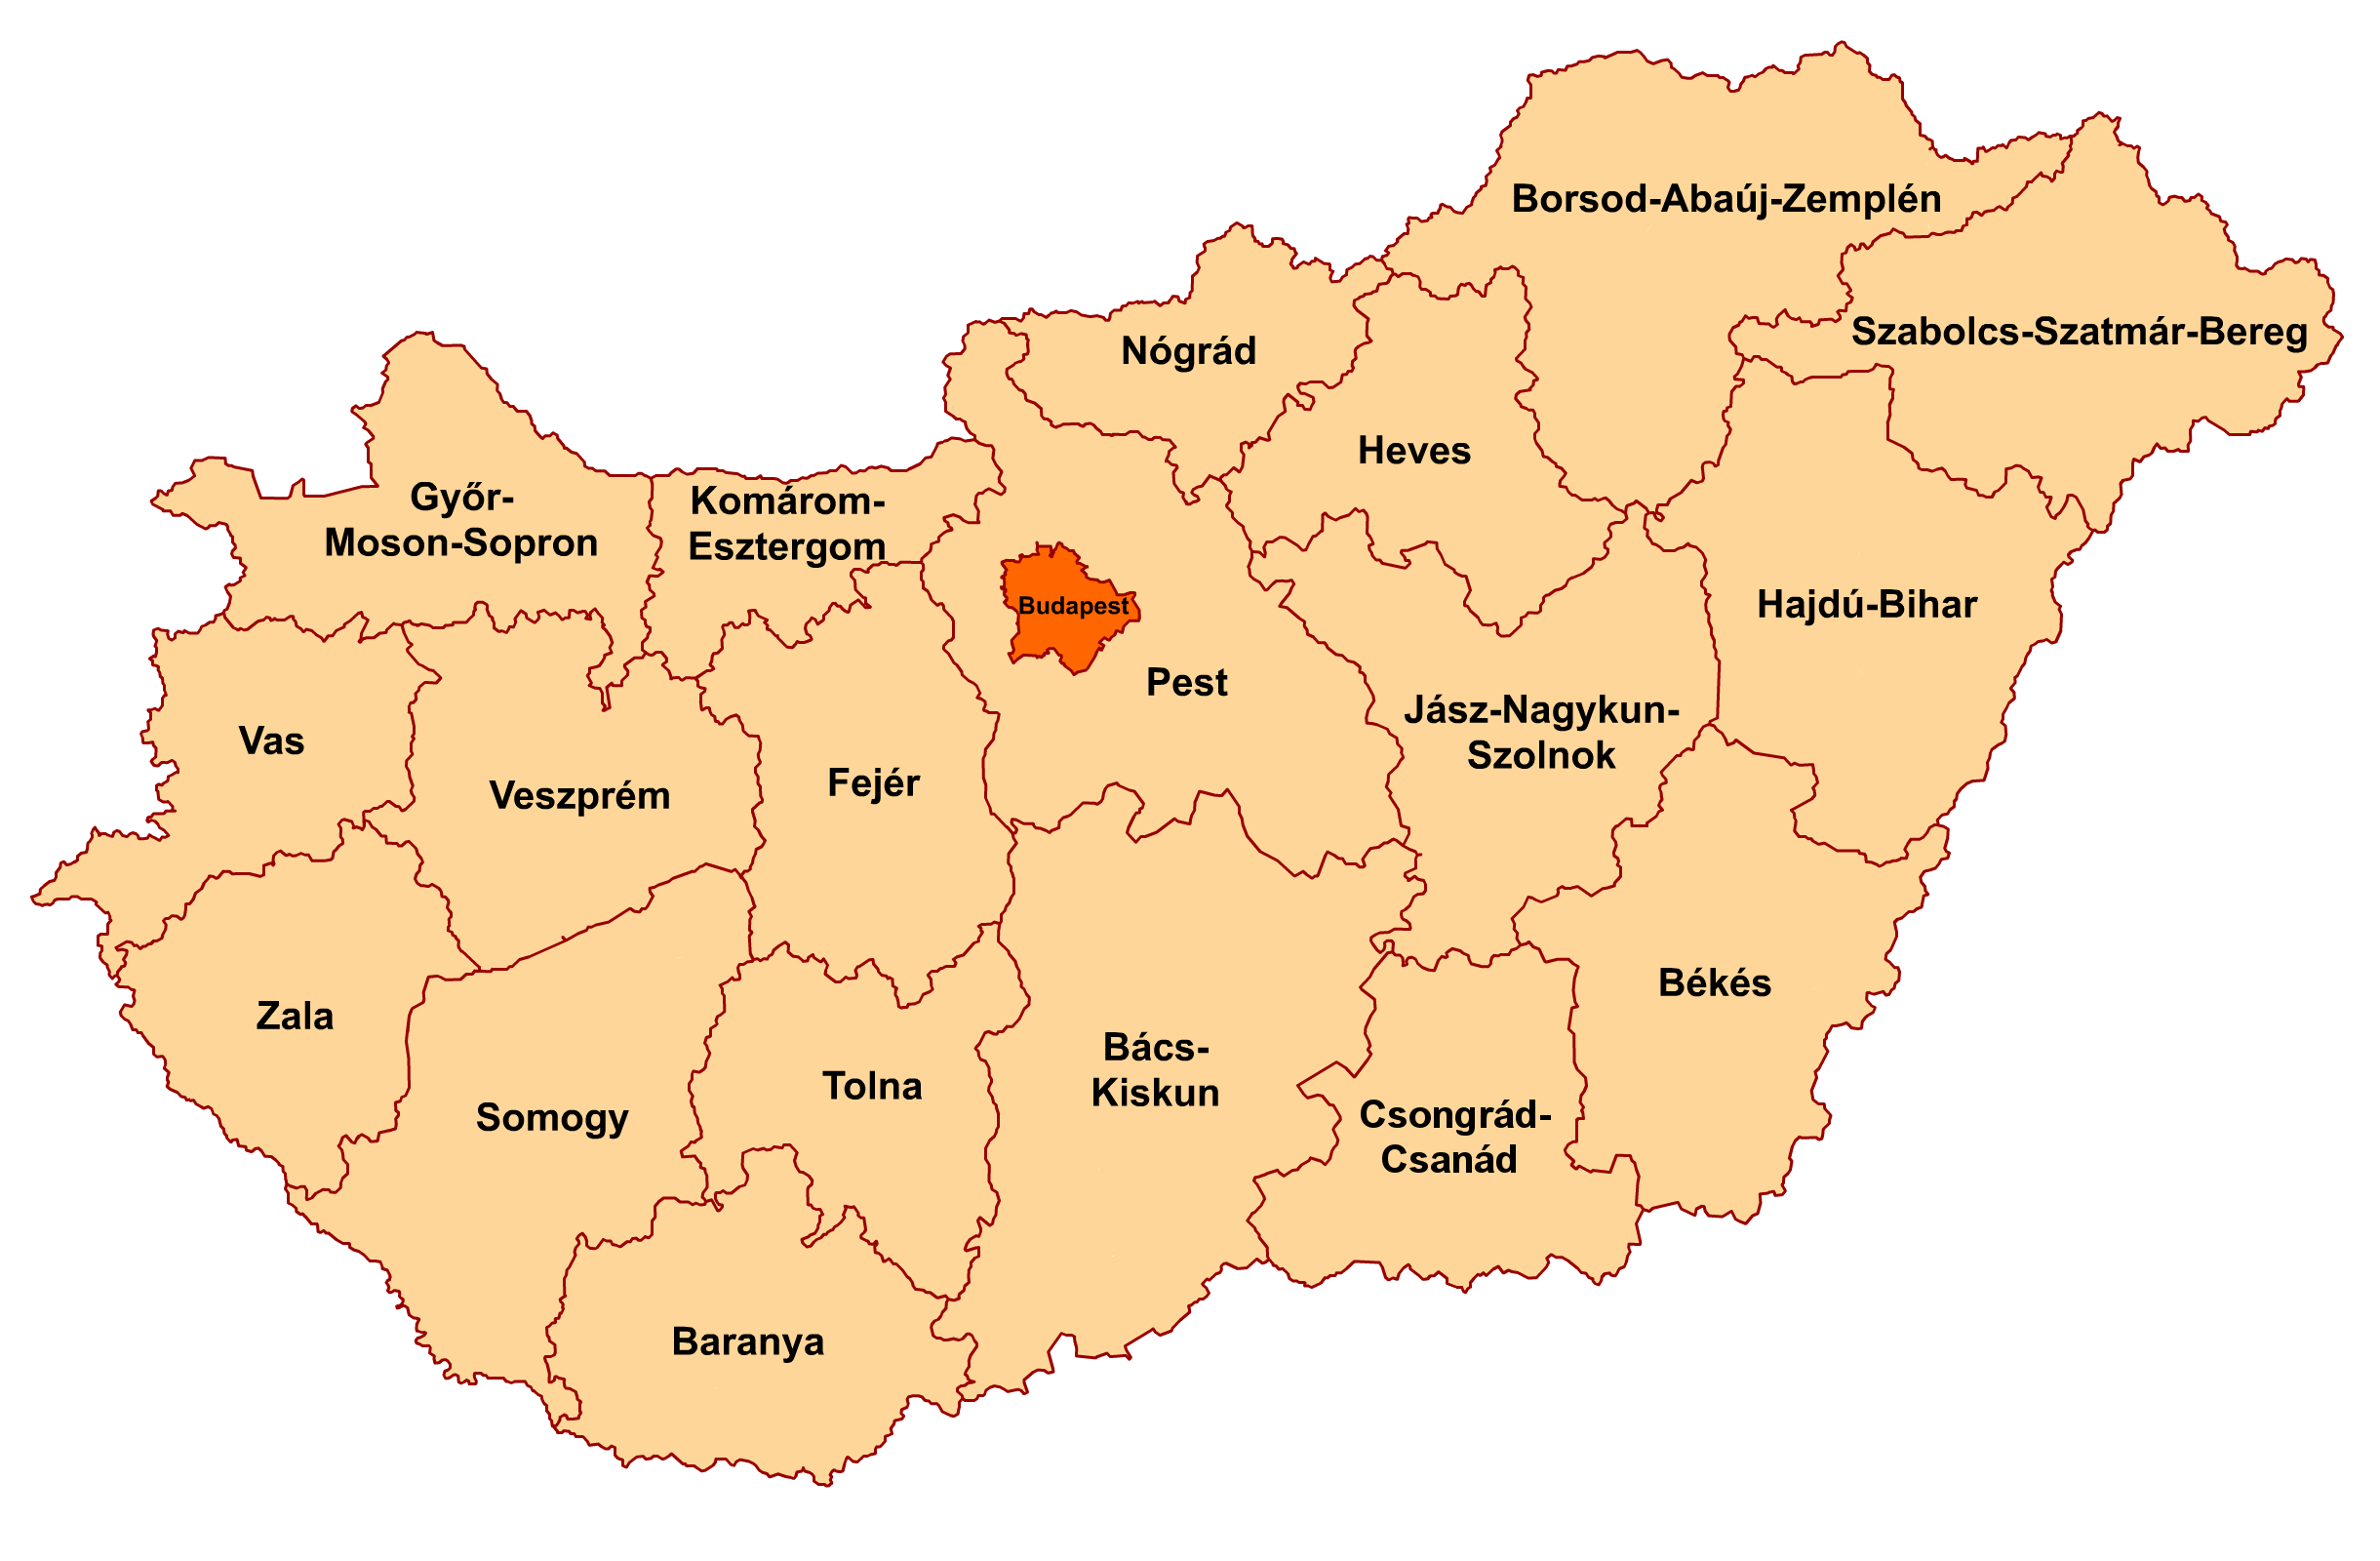

In [ ]:
from IPython.display import Image

data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/Counties_of_Hungary_2020.png'
r = requests.get(data_url)
open('Counties_of_Hungary_2020.png', 'wb').write(r.content)


Image(filename='Counties_of_Hungary_2020.png') 

## Linear Correlation: Pearson Correlation

In [ ]:
Corr_mat=np.zeros((20,20))

for i in range(1,21):
    for j in range(1,21):
        d_ts=h_cp_ts.values[:,i]
        d_ts=h_cp_ts.values[:,j]
        Corr_mat[i-1,j-1]=st.pearsonr(h_cp_ts.values[:,i], h_cp_ts.values[:,j])[0]

In [ ]:
c_names=h_cp_ts.keys()[1:21]

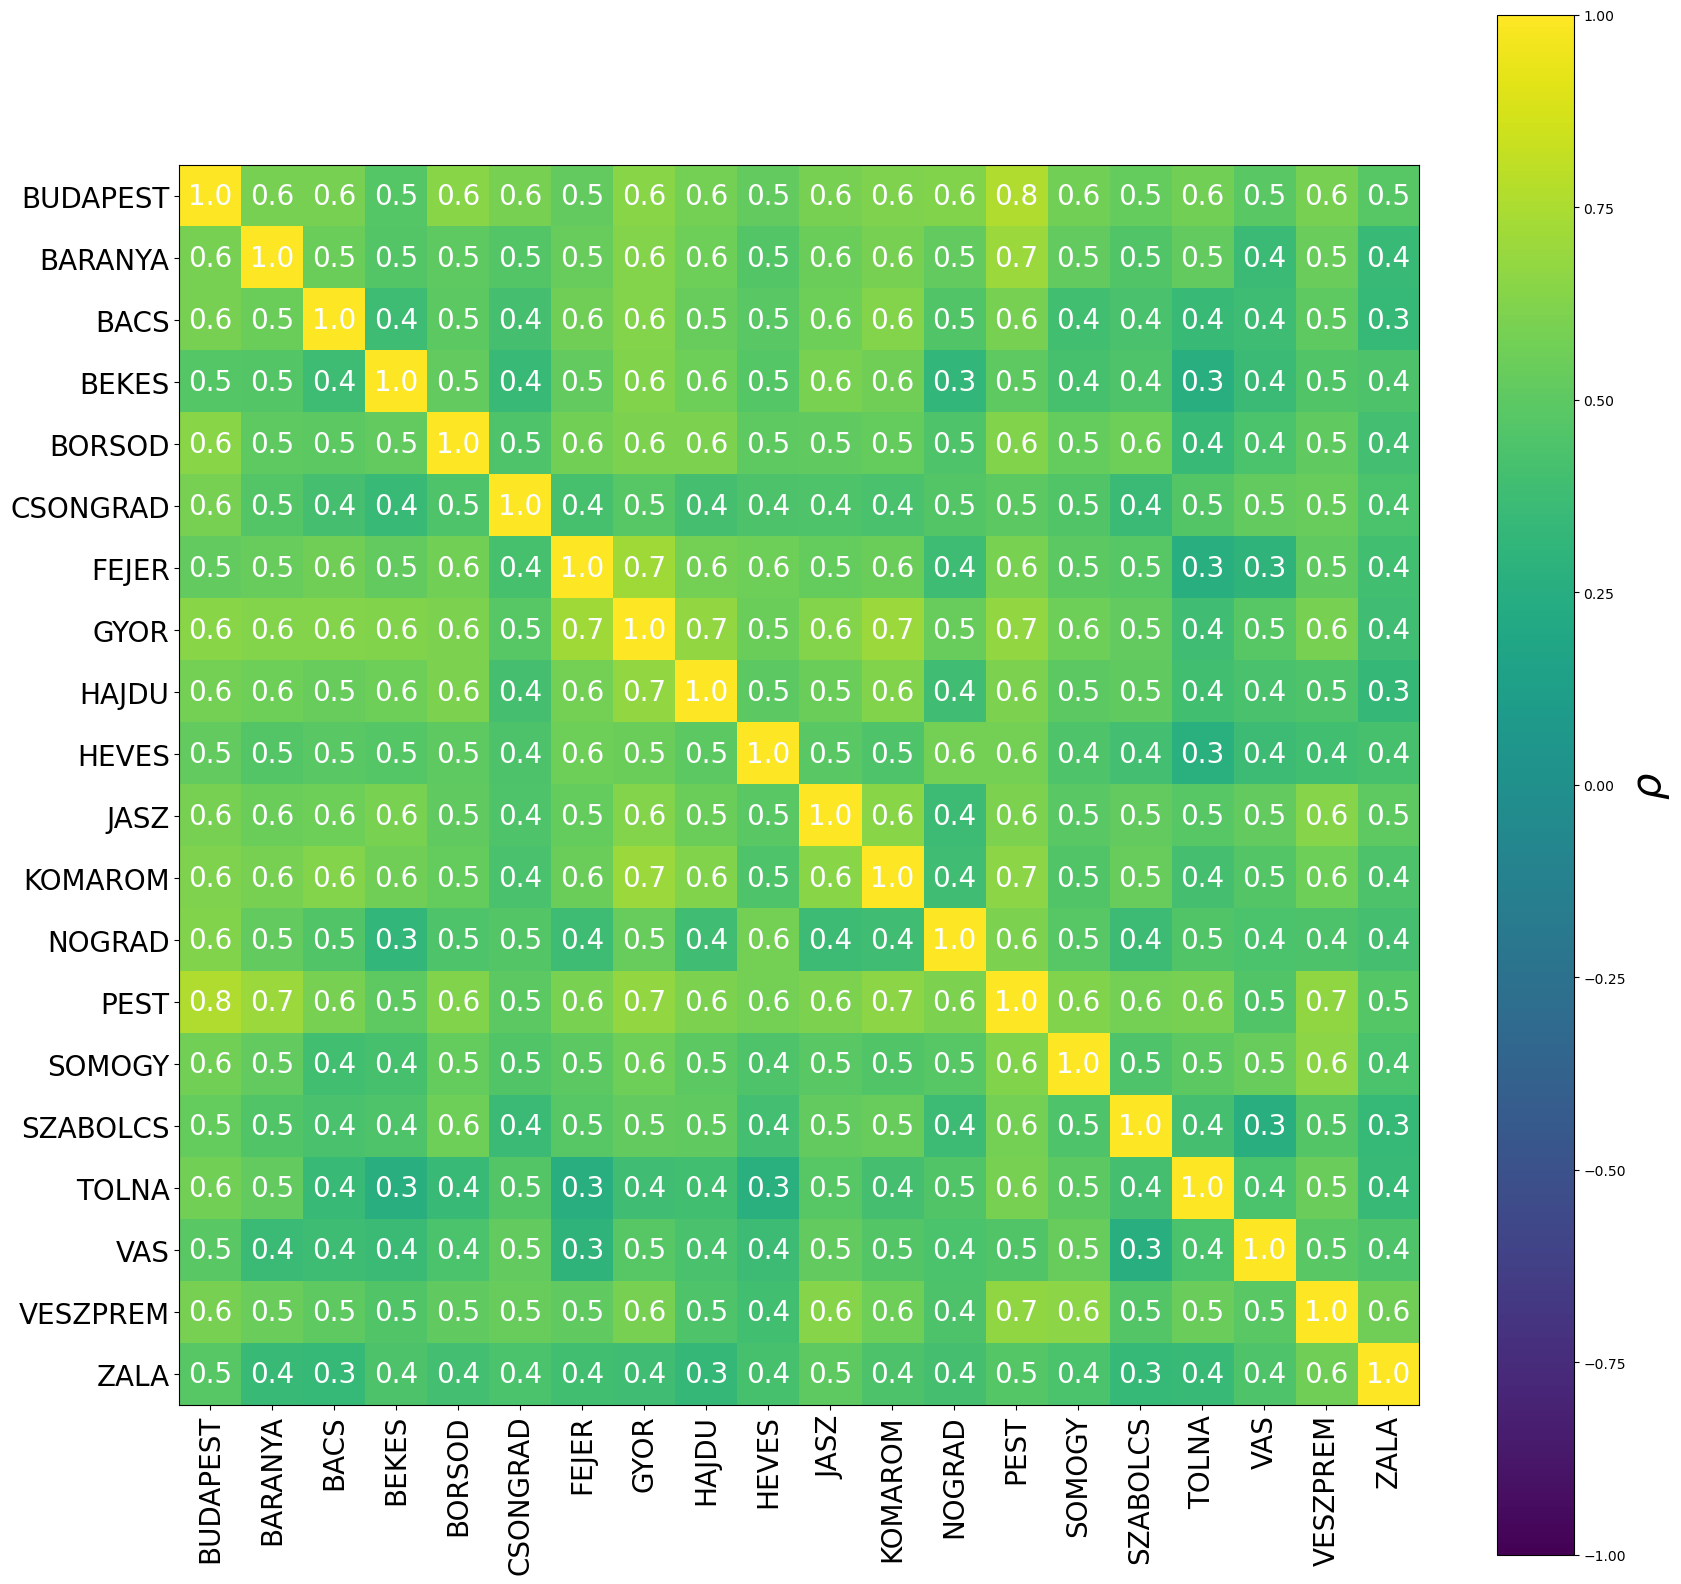

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(Corr_mat)
    
plt.yticks(np.arange(len(c_names)), labels=c_names,fontsize=20)
plt.xticks(np.arange(len(c_names)), labels=c_names,rotation=90,fontsize=20)


for i in range(len(c_names)):
    for j in range(len(c_names)):
        text = plt.text(j, i, '%1.1f' % Corr_mat[i, j],ha="center", va="center", color="w",fontsize=20)


cbar=plt.colorbar()
plt.clim(-1.0,1.0)
cbar.set_label(r'$\rho$',fontsize=30)

## Nonlinear Coreelation: Mutual Information

In [ ]:
import sklearn.metrics as skkmt

In [ ]:
mut_mat=np.zeros((20,20))

for i in range(1,21):
    for j in range(1,21):
        d_ts_i=np.array(h_cp_ts.values[:,i].tolist())
        d_ts_j=np.array(h_cp_ts.values[:,j].tolist())
        
        
        
        mut_mat[i-1,j-1]=skkmt.mutual_info_score(d_ts_i,d_ts_j)

#mut_mat=mut_mat/np.max(mut_mat)  

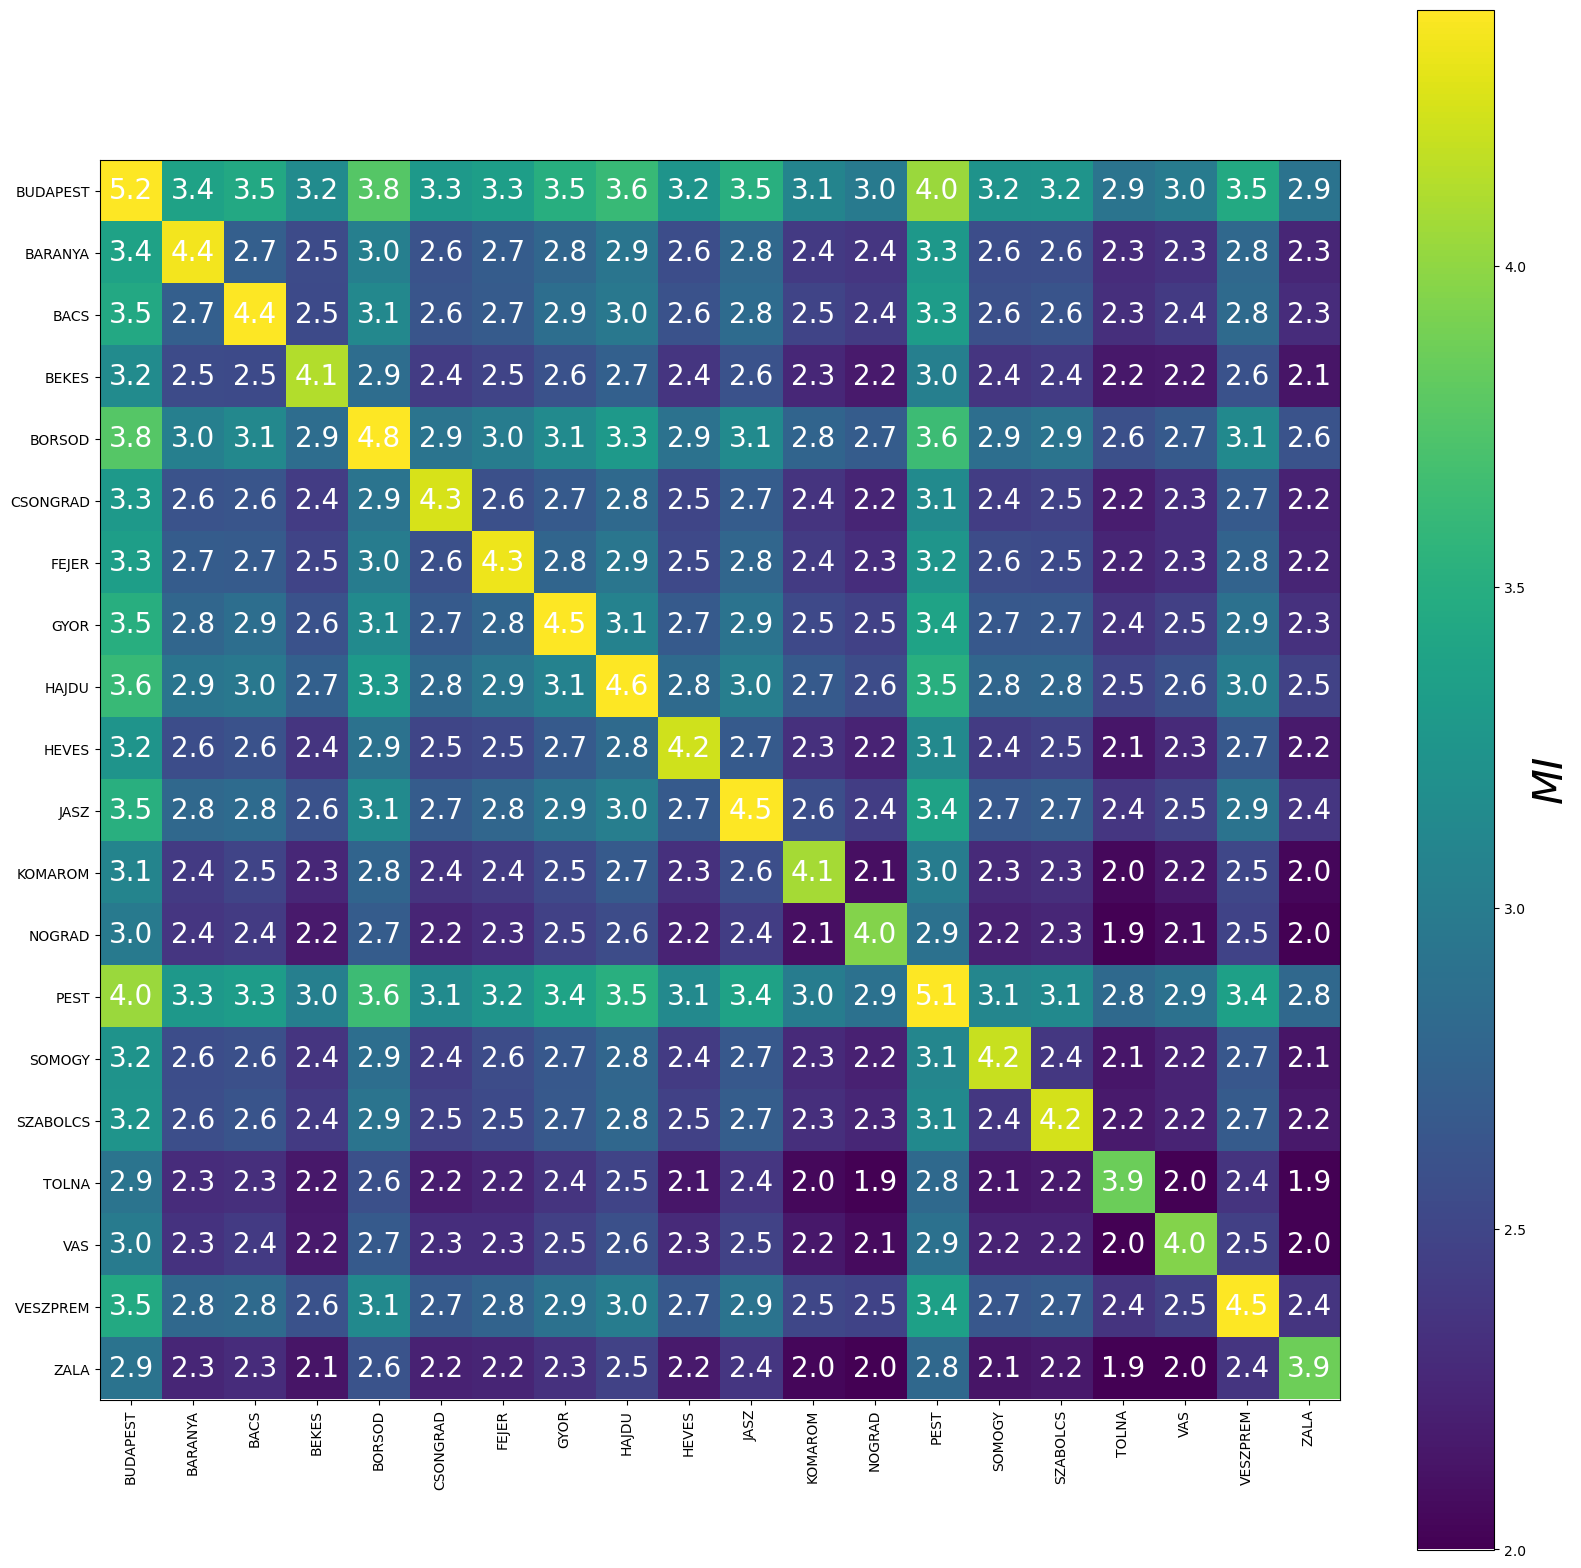

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(mut_mat)
    
plt.yticks(np.arange(len(c_names)), labels=c_names)
plt.xticks(np.arange(len(c_names)), labels=c_names,rotation=90)


for i in range(len(c_names)):
    for j in range(len(c_names)):
        text = plt.text(j, i, '%1.1f' % mut_mat[i, j],ha="center", va="center", color="w",fontsize=20)


cbar=plt.colorbar()
plt.clim(2.0,4.4)
cbar.set_label(r'$MI$',fontsize=30)

## Phase Synchronization

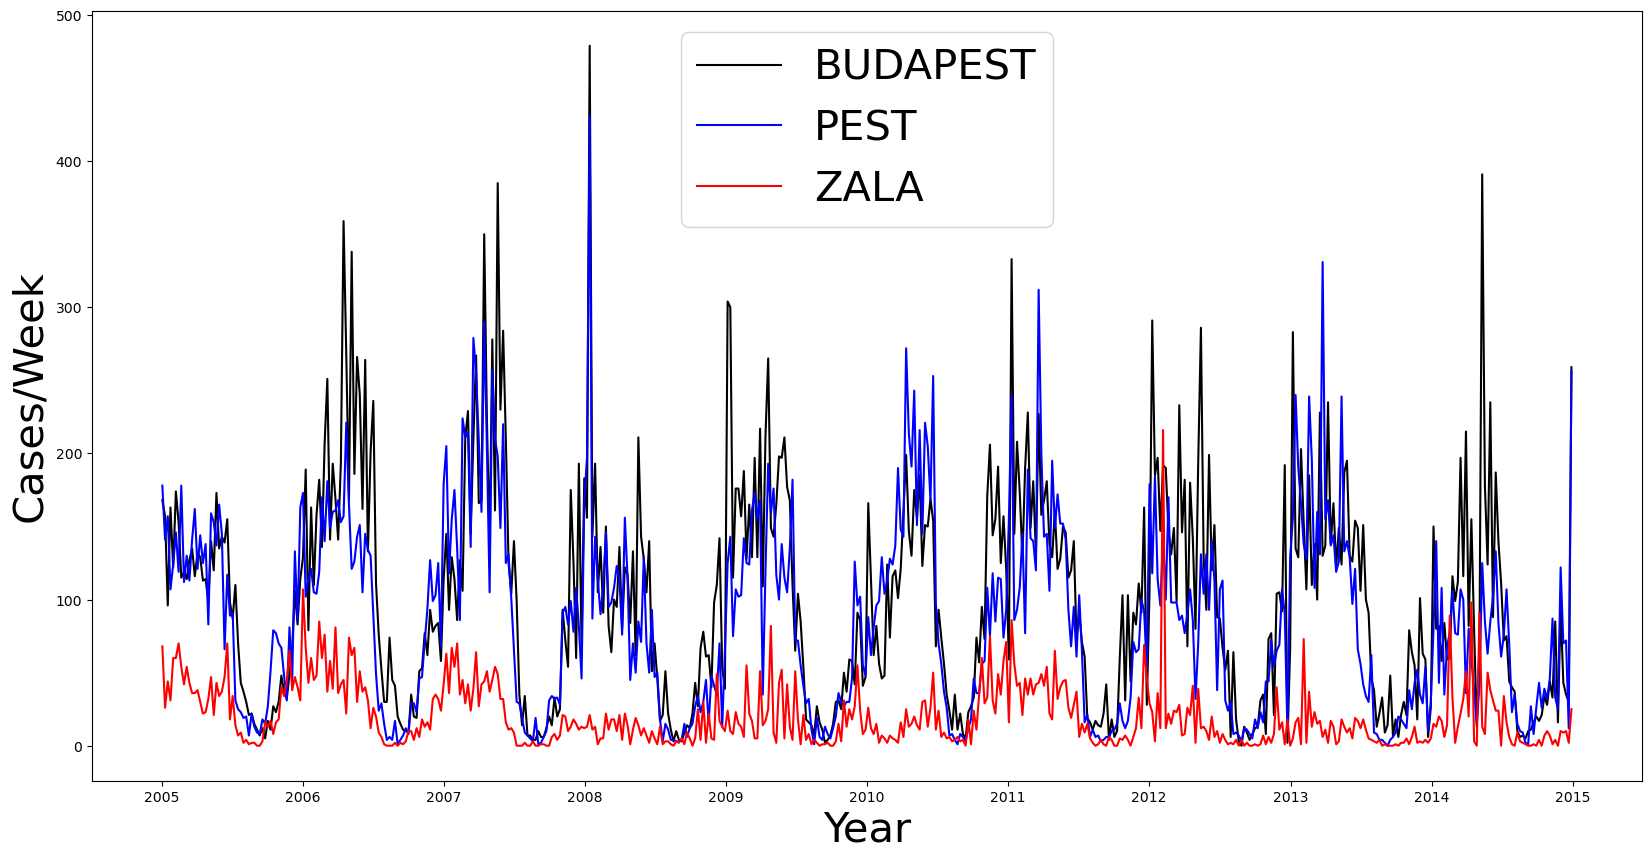

In [ ]:
plt.figure(figsize=(20,10))



#k_ts=h_cp_ts.keys()[i]

d_ts=h_cp_ts['BUDAPEST']
plt.plot(pdates,d_ts,color='k',label='BUDAPEST')

d_ts=h_cp_ts['PEST']
plt.plot(pdates,d_ts,color='b',label='PEST')

d_ts=h_cp_ts['ZALA']
plt.plot(pdates,d_ts,color='r',label='ZALA')


#ax.set_title('%s' %k_ts,fontsize=20)
plt.gca().xaxis.set_major_formatter(mdate.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.legend(fontsize=30)

plt.ylabel('Cases/Week', fontsize=30);
plt.xlabel('Year', fontsize=30);

In [ ]:
from scipy.signal import hilbert

In [ ]:
 = np.angle(hilbert(h_cp_ts['BUDAPEST']))
p_p = np.angle(hilbert(h_cp_ts['PEST']))
z_p = np.angle(hilbert(h_cp_ts['ZALA']))

#phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
#N = len(al1)b_p

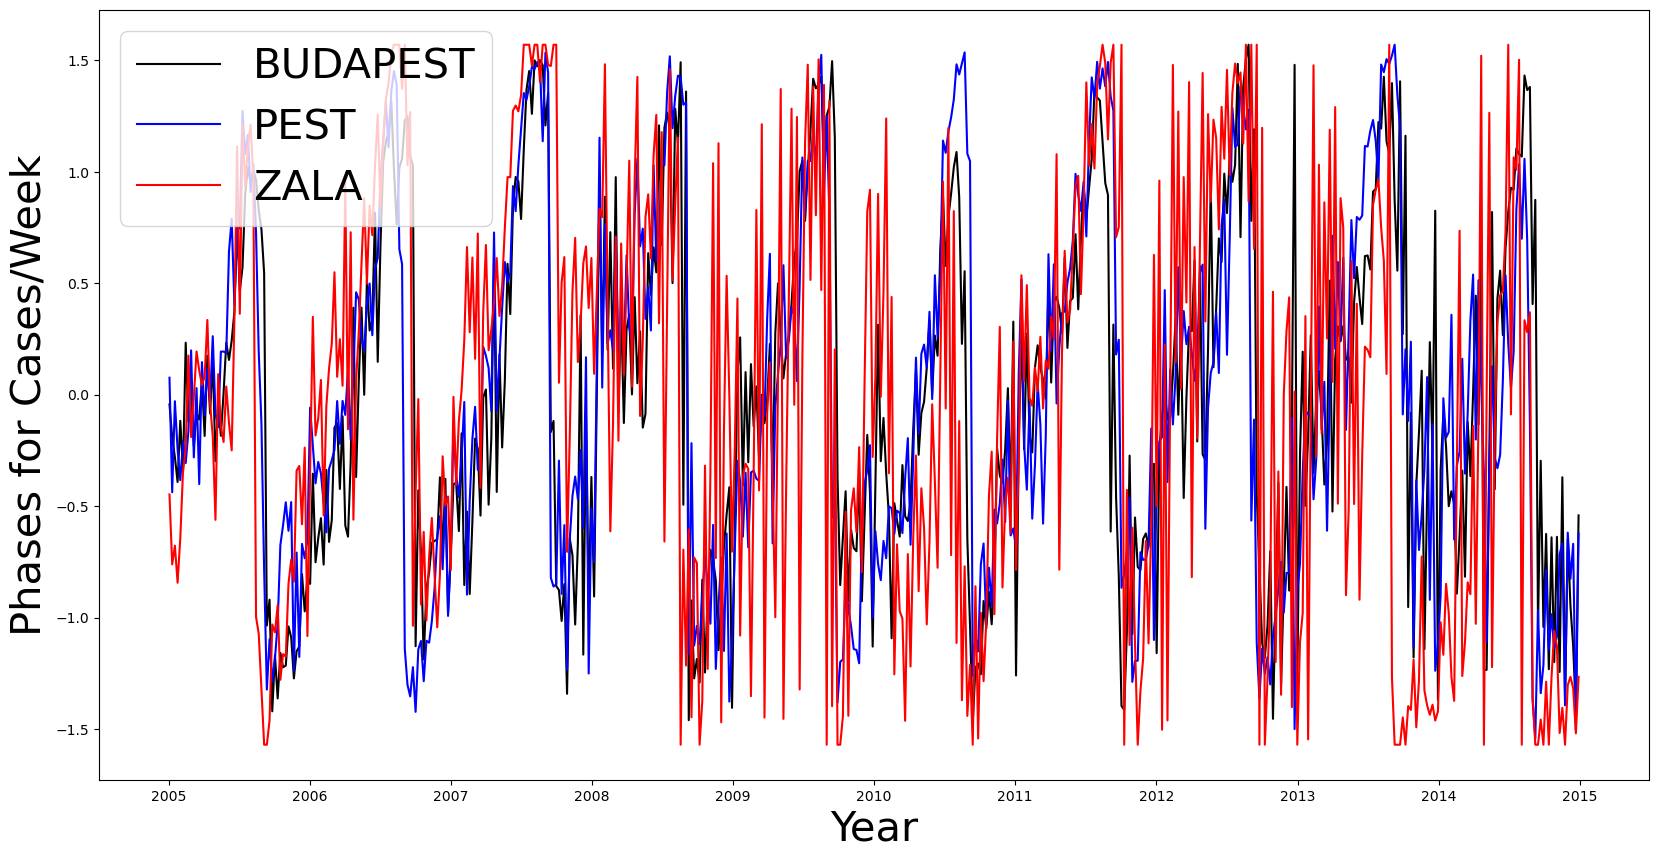

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pdates,b_p,color='k',label='BUDAPEST')
plt.plot(pdates,p_p,color='b',label='PEST')
plt.plot(pdates,z_p,color='r',label='ZALA')

plt.gca().xaxis.set_major_formatter(mdate.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.legend(fontsize=30)

plt.ylabel('Phases for Cases/Week', fontsize=30);
plt.xlabel('Year', fontsize=30);

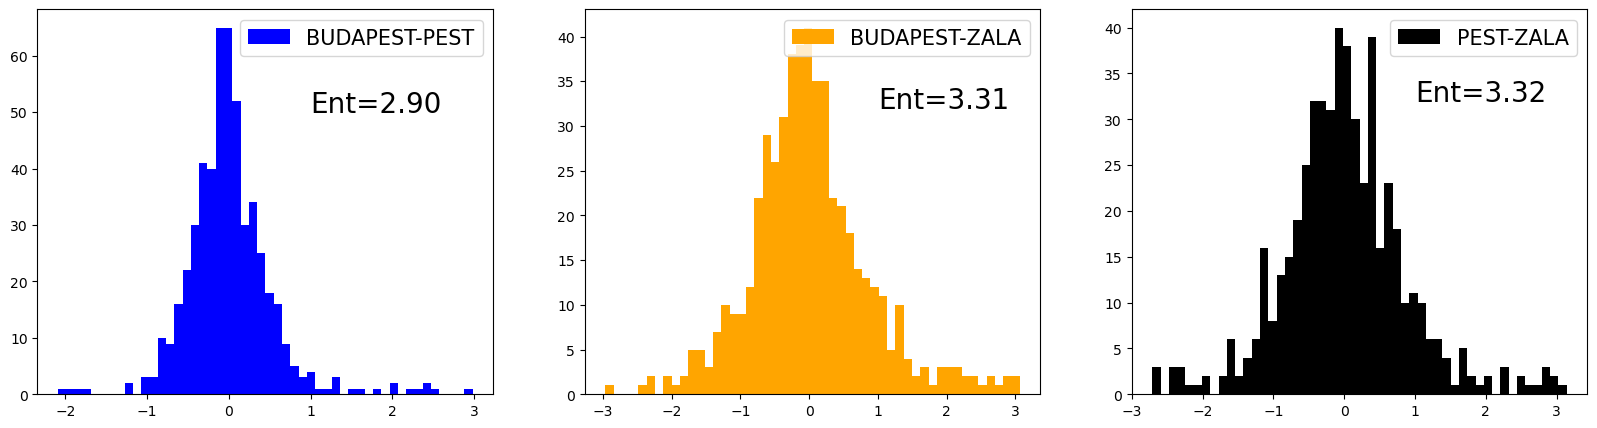

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
h1=plt.hist(b_p-p_p,bins=50,label='BUDAPEST-PEST',color='b');
plt.legend(fontsize=15)
prob=h1[0]; prob=prob[h1[0]>0.];prob=prob/sum(prob)
ent = -(prob*np.log(np.abs(prob))).sum()
plt.text(1,50, 'Ent=%1.2f' %ent,fontsize=20)



#h1[0]



plt.subplot(1,3,2)
h1=plt.hist(b_p-z_p,bins=50,label='BUDAPEST-ZALA',color='orange');
plt.legend(fontsize=15)
prob=h1[0]; prob=prob[h1[0]>0.];prob=prob/sum(prob)
ent = -(prob*np.log(np.abs(prob))).sum()
plt.text(1,32, 'Ent=%1.2f' %ent,fontsize=20)


plt.subplot(1,3,3)
h1=plt.hist(p_p-z_p,bins=50,label='PEST-ZALA',color='k');
plt.legend(fontsize=15);
prob=h1[0]; prob=prob[h1[0]>0.];prob=prob/sum(prob)
ent = -(prob*np.log(np.abs(prob))).sum()
plt.text(1,32, 'Ent=%1.2f' %ent,fontsize=20);